In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE 
from sklearn.metrics import r2_score  
import statsmodels.api as sm    # for detailed statestical analysis beyond what sklearn provides
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import datetime    # used to work with date and time
import calendar    # it provides functions related to calender operations 
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('boombikes.csv')

In [3]:
df

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

In [4]:
seasons= {1:'spring',2:'summer',3:'Fall',4:'winter'}
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
weathers = {1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'}
weekdays = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
#years={0:'2018',1:'2019'}

In [5]:
df['season']=df['season'].map(seasons)
df['mnth']=df['mnth'].map(months)
df['weathersit']=df['weathersit'].map(weathers)
df['weekday']=df['weekday'].map(weekdays)

In [6]:
df.head()

instant      dteday  season  yr mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0   Saturday           0   
1        2  02-01-2018  spring   0  Jan        0     Sunday           0   
2        3  03-01-2018  spring   0  Jan        0     Monday           1   
3        4  04-01-2018  spring   0  Jan        0    Tuesday           1   
4        5  05-01-2018  spring   0  Jan        0  Wednesday           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       Mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       Mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

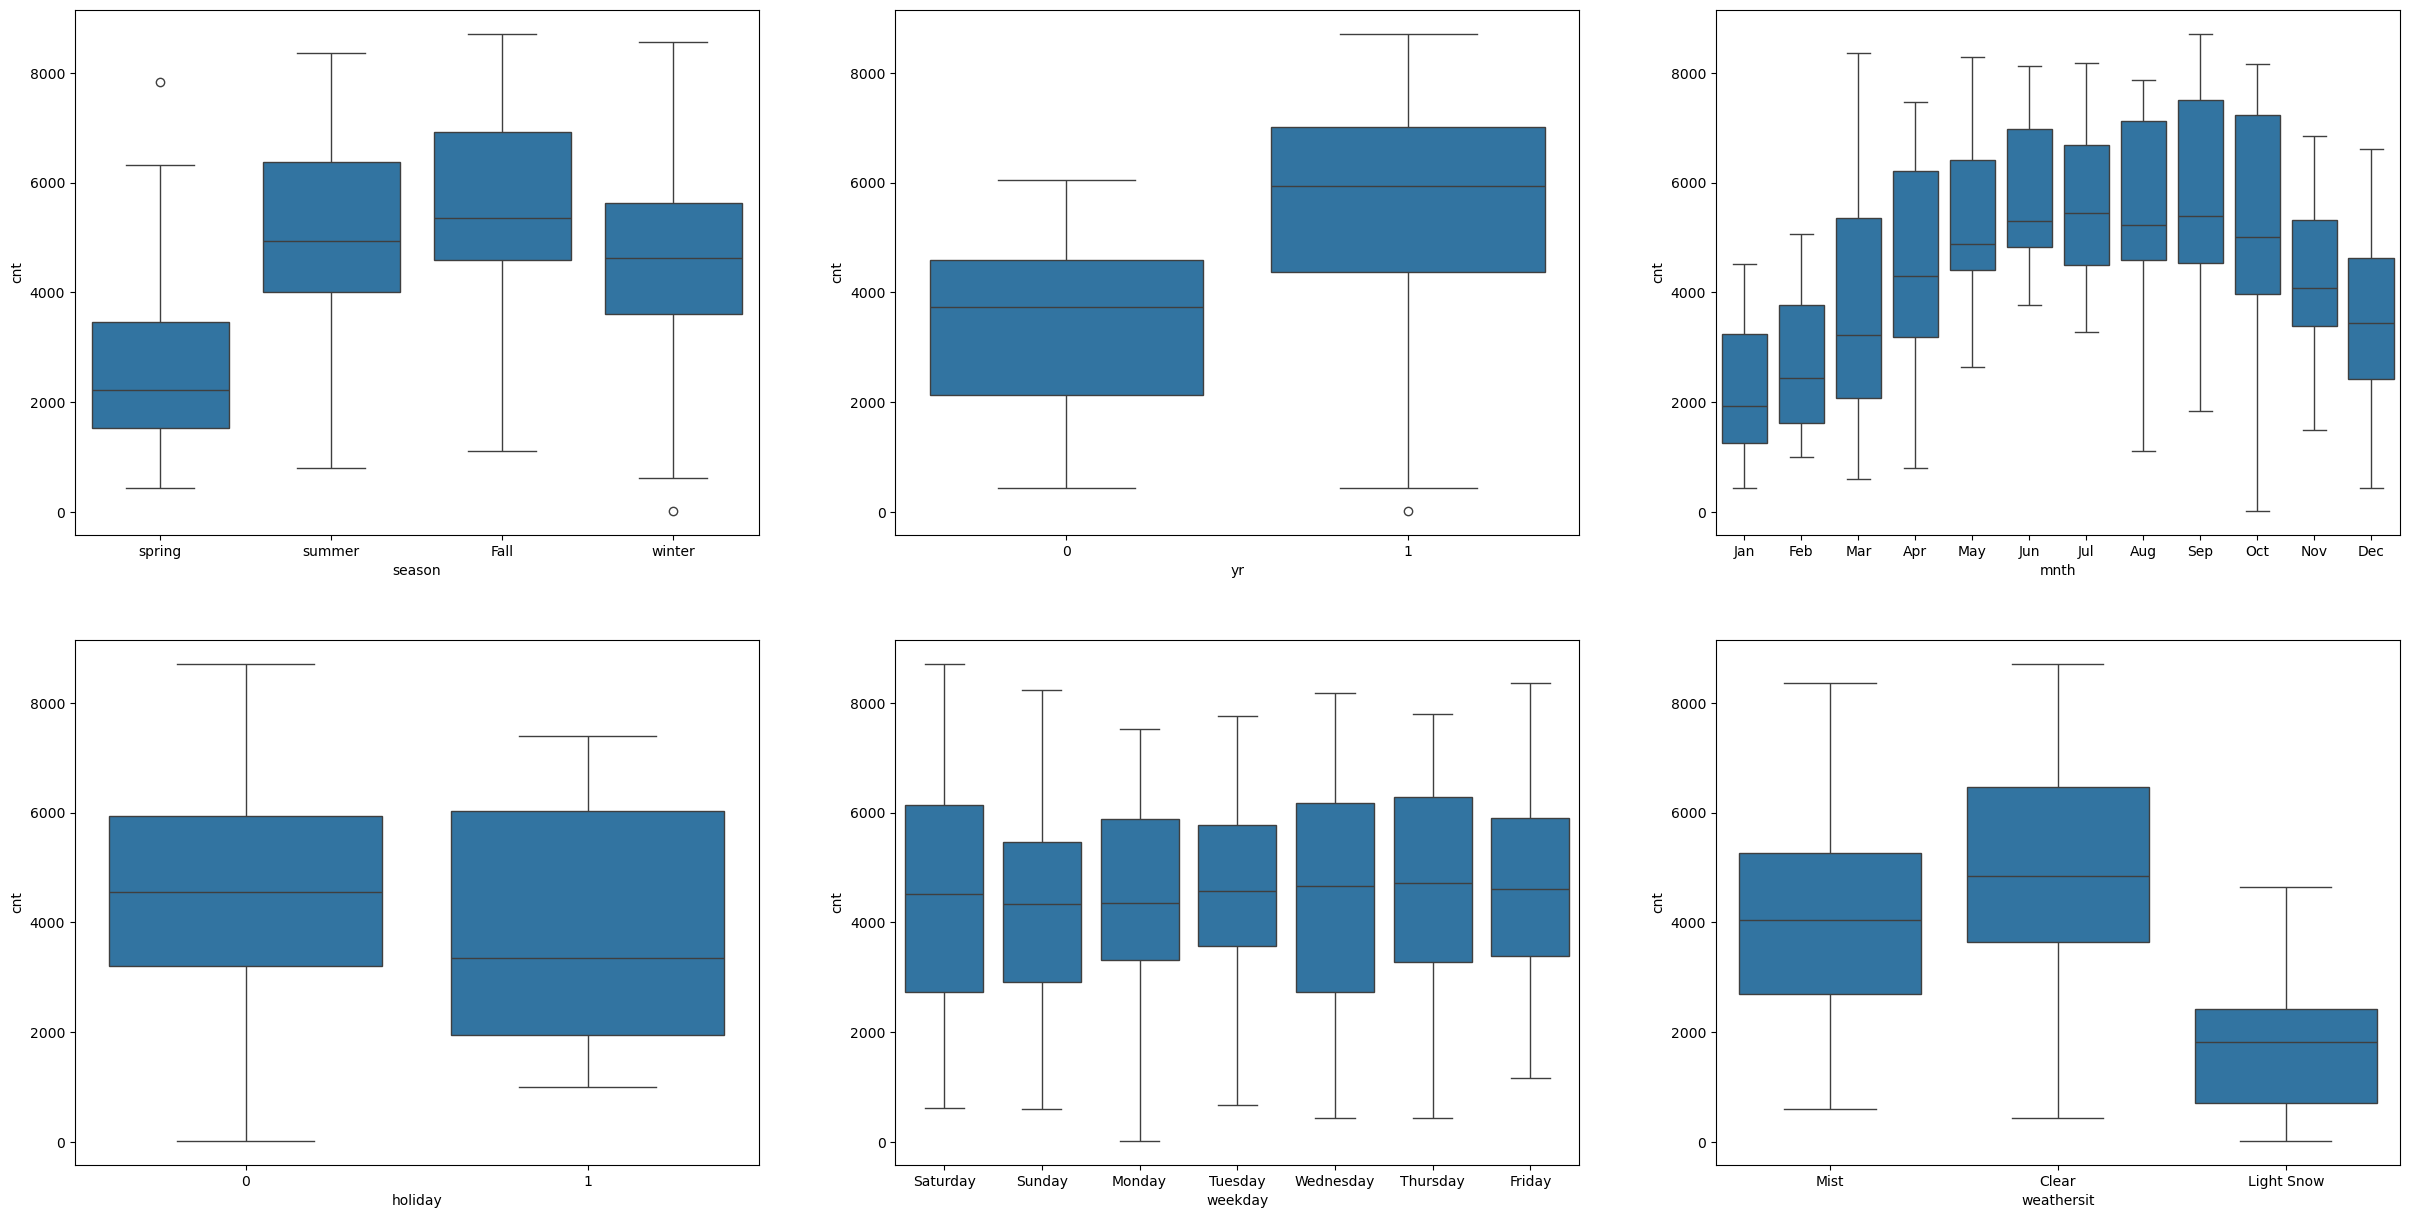

In [7]:
plt.figure(figsize=(30, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data=df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data=df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data=df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data=df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data=df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data=df)
plt.show()

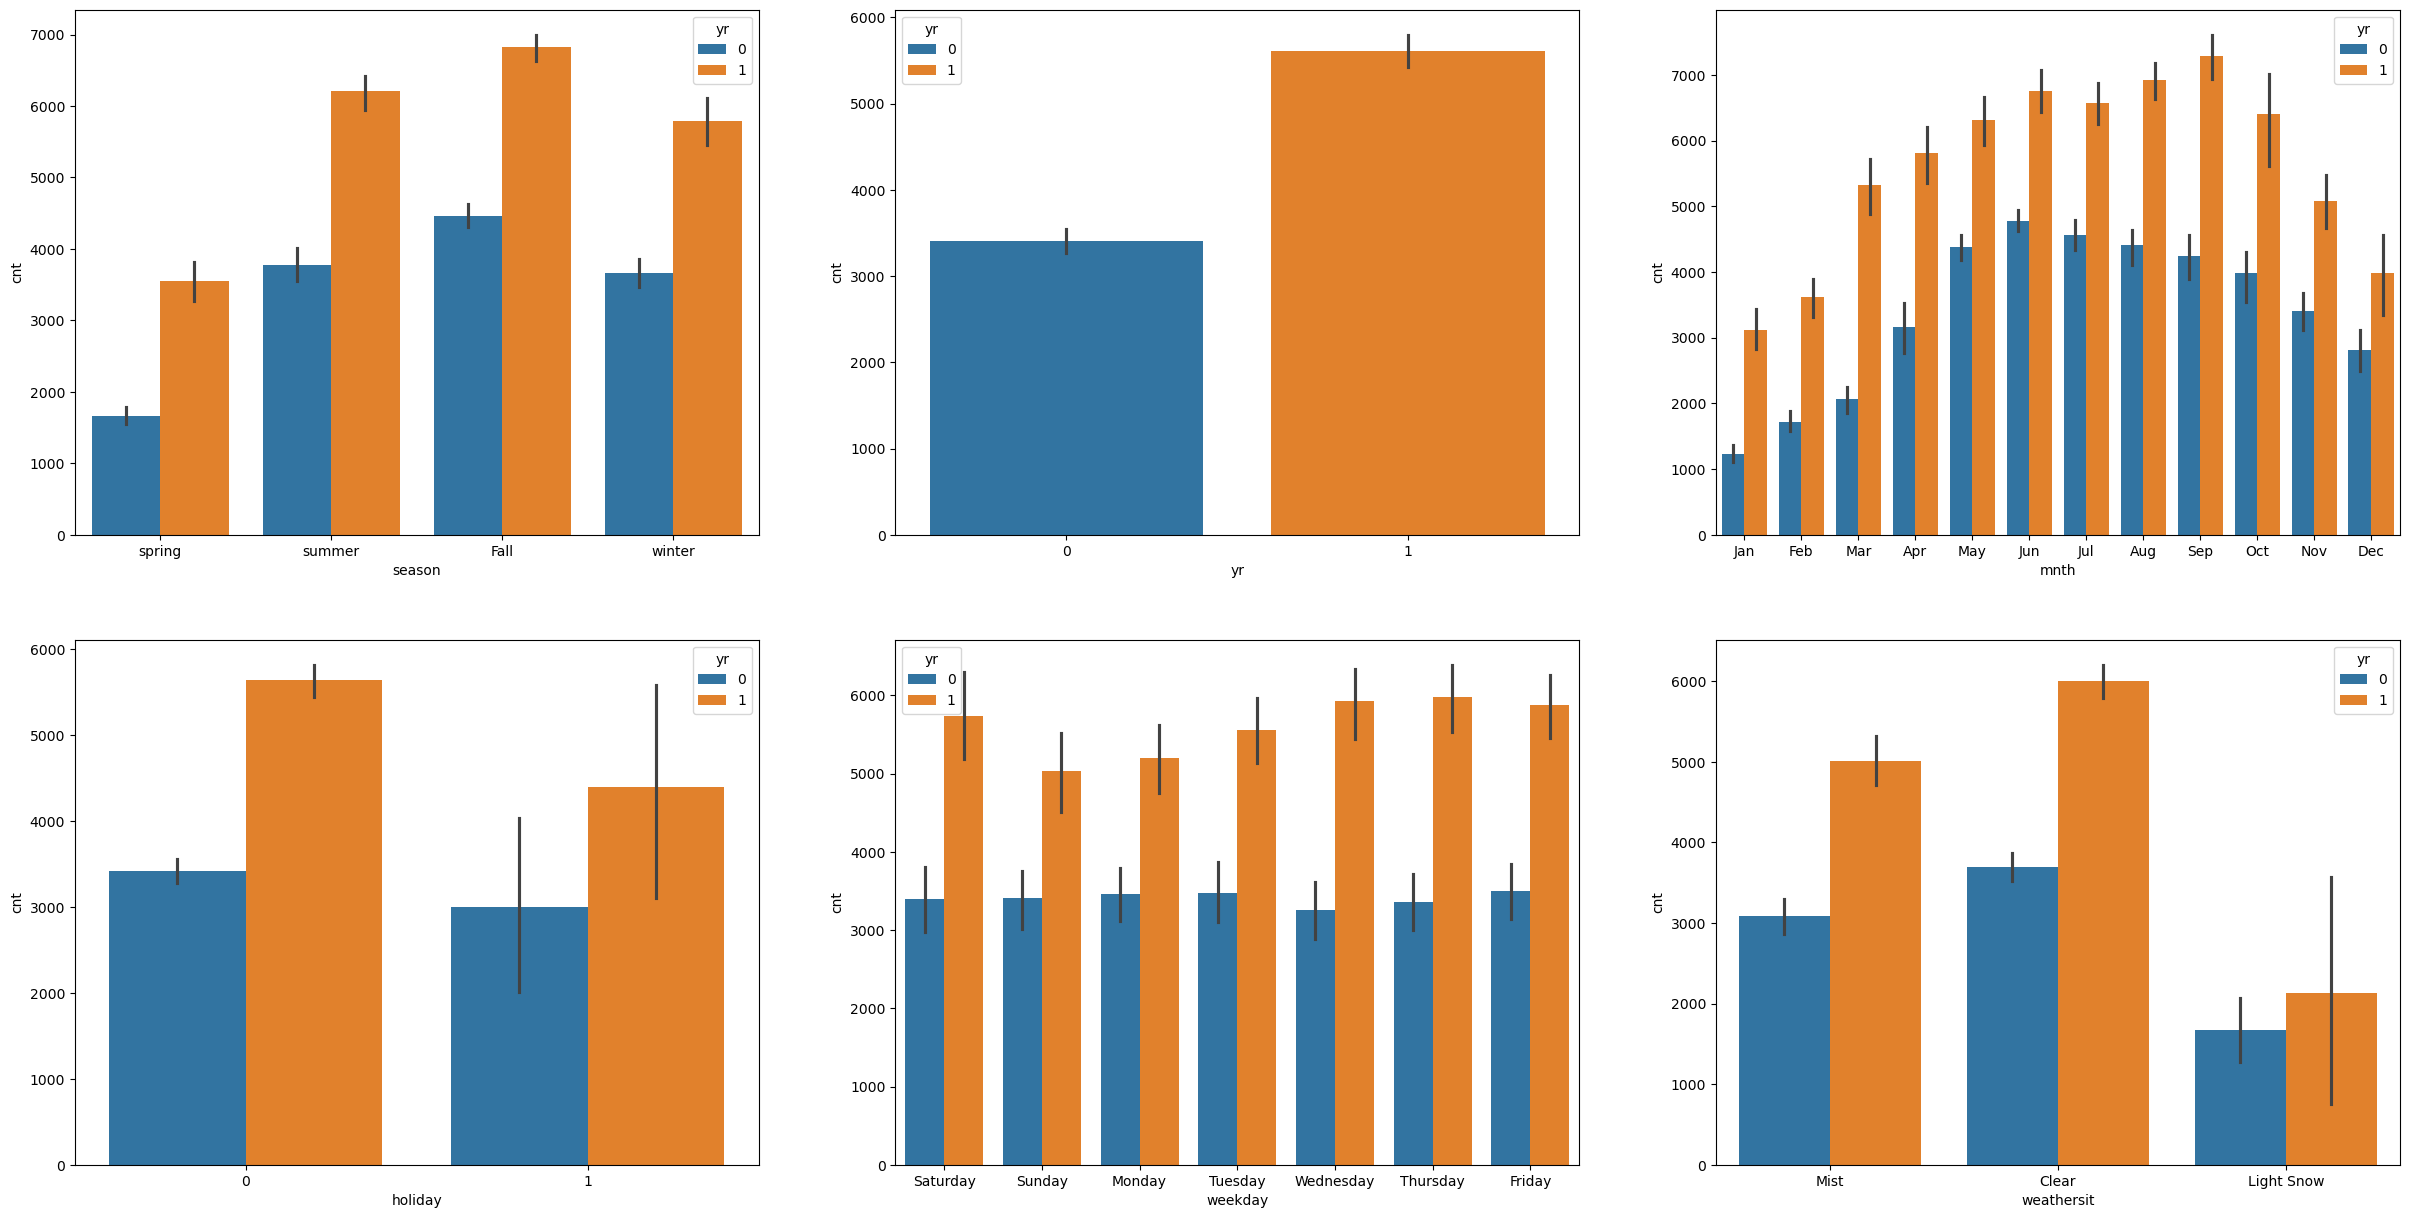

In [8]:
# Exploratory data analysiplt.figure(figsize=(25, 10))
plt.figure(figsize=(30, 15))
plt.subplot(2,3,1)
sns.barplot(x = 'season', y = 'cnt', data=df, hue='yr')
plt.subplot(2,3,2)
sns.barplot(x = 'yr', y = 'cnt', data=df,hue='yr')
plt.subplot(2,3,3)
sns.barplot(x = 'mnth', y = 'cnt', data=df,hue='yr')
plt.subplot(2,3,4)
sns.barplot(x = 'holiday', y = 'cnt', data=df,hue='yr')
plt.subplot(2,3,5)
sns.barplot(x = 'weekday', y = 'cnt', data=df,hue='yr')
plt.subplot(2,3,6)
sns.barplot(x = 'weathersit', y = 'cnt', data=df,hue='yr')
plt.show()

<Axes: >

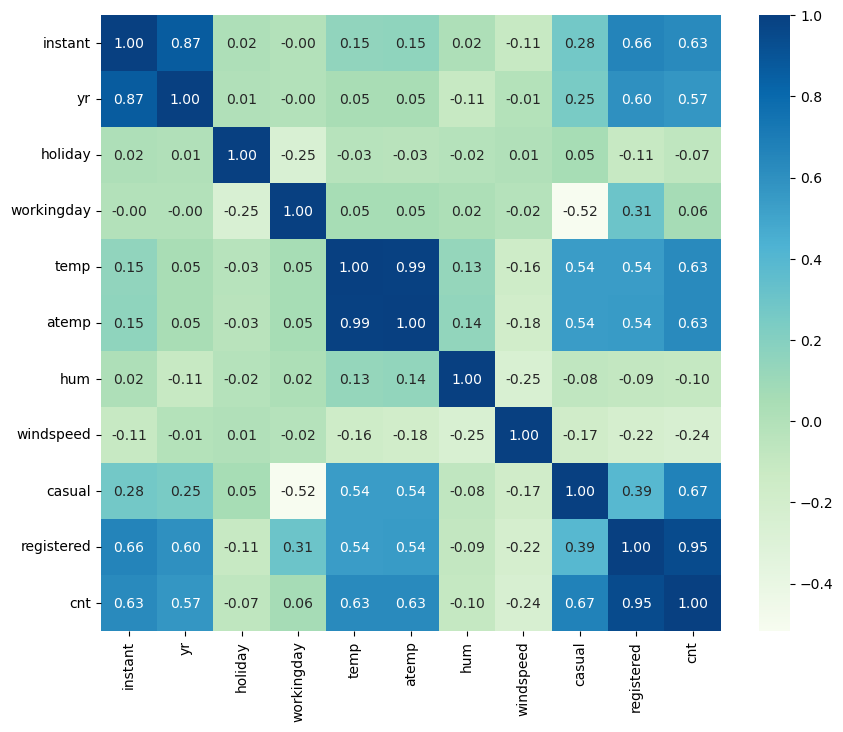

In [9]:
numeric_df=df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f',cmap='GnBu')

In [10]:
dum1 = pd.get_dummies(df[['season', 'mnth', 'weekday','weathersit']], drop_first=True,dtype=int)

In [11]:
dum1

season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  \
0                1              0              0         0         0   
1                1              0              0         0         0   
2                1              0              0         0         0   
3                1              0              0         0         0   
4                1              0              0         0         0   
..             ...            ...            ...       ...       ...   
725              1              0              0         0         1   
726              1              0              0         0         1   
727              1              0              0         0         1   
728              1              0              0         0         1   
729              1              0              0         0         1   

     mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  ...  mnth_Oct  \
0           0         1         0         0         0  ...         0   
1           0         1         0         0         0  ...         0   
2           0         1         0         0         0  ...         0   
3           0         1         0         0         0  ...         0   
4           0         1         0         0         0  ...         0   
..        ...       ...       ...       ...       ...  ...       ...   
725         0         0         0         0         0  ...         0   
726         0         0         0         0         0  ...         0   
727         0         0         0         0         0  ...         0   
728         0         0         0         0         0  ...         0   
729         0         0         0         0         0  ...         0   

     mnth_Sep  weekday_Monday  weekday_Saturday  weekday_Sunday  \
0           0               0                 1               0   
1           0               0                 0               1   
2           0               1                 0               0   
3           0               0                 0               0   
4           0               0                 0               0   
..        ...             ...               ...             ...   
725         0               0                 0               0   
726         0               0                 0               0   
727         0               0                 1               0   
728         0               0                 0               1   
729         0               1                 0               0   

     weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
0                   0                0                  0   
1                   0                0                  0   
2                   0                0                  0   
3                   0                1                  0   
4                   0                0                  1   
..                ...              ...                ...   
725                 1                0                  0   
726                 0                0                  0   
727                 0                0                  0   
728                 0                0                  0   
729                 0                0                  0   

     weathersit_Light Snow  weathersit_Mist  
0                        0                1  
1                        0                1  
2                        0                0  
3                        0                0  
4                        0                0  
..                     ...              ...  
725                      0                1  
726                      0                1  
727                      0                1  
728                      0                0  
729                      0                1  

[730 rows x 22 columns]

In [12]:
realdf=pd.concat([df,dum1],axis=1)

In [13]:
realdf.head()

instant      dteday  season  yr mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0   Saturday           0   
1        2  02-01-2018  spring   0  Jan        0     Sunday           0   
2        3  03-01-2018  spring   0  Jan        0     Monday           1   
3        4  04-01-2018  spring   0  Jan        0    Tuesday           1   
4        5  05-01-2018  spring   0  Jan        0  Wednesday           1   

  weathersit       temp  ...  mnth_Oct  mnth_Sep  weekday_Monday  \
0       Mist  14.110847  ...         0         0               0   
1       Mist  14.902598  ...         0         0               0   
2      Clear   8.050924  ...         0         0               1   
3      Clear   8.200000  ...         0         0               0   
4      Clear   9.305237  ...         0         0               0   

   weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0                 1               0                 0                0   
1                 0               1                 0                0   
2                 0               0                 0                0   
3                 0               0                 0                1   
4                 0               0                 0                0   

   weekday_Wednesday  weathersit_Light Snow  weathersit_Mist  
0                  0                      0                1  
1                  0                      0                1  
2                  0                      0                0  
3                  0                      0                0  
4                  1                      0                0  

[5 rows x 38 columns]

In [14]:
realdf=realdf.drop(['season', 'mnth', 'weekday','weathersit'],axis=1)

In [15]:
realdf.head()

instant      dteday  yr  holiday  workingday       temp     atemp      hum  \
0        1  01-01-2018   0        0           0  14.110847  18.18125  80.5833   
1        2  02-01-2018   0        0           0  14.902598  17.68695  69.6087   
2        3  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3        4  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4        5  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  mnth_Oct  mnth_Sep  weekday_Monday  \
0  10.749882     331  ...         0         0               0   
1  16.652113     131  ...         0         0               0   
2  16.636703     120  ...         0         0               1   
3  10.739832     108  ...         0         0               0   
4  12.522300      82  ...         0         0               0   

   weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0                 1               0                 0                0   
1                 0               1                 0                0   
2                 0               0                 0                0   
3                 0               0                 0                1   
4                 0               0                 0                0   

   weekday_Wednesday  weathersit_Light Snow  weathersit_Mist  
0                  0                      0                1  
1                  0                      0                1  
2                  0                      0                0  
3                  0                      0                0  
4                  1                      0                0  

[5 rows x 34 columns]

In [16]:
scaler = MinMaxScaler()

In [17]:
numeric_vars = ['temp','atemp','hum','windspeed','cnt']
realdf[numeric_vars] = scaler.fit_transform(realdf[numeric_vars])

In [18]:
realdf.head()

instant      dteday  yr  holiday  workingday      temp     atemp       hum  \
0        1  01-01-2018   0        0           0  0.355170  0.373517  0.828620   
1        2  02-01-2018   0        0           0  0.379232  0.360541  0.715771   
2        3  03-01-2018   0        0           1  0.171000  0.144830  0.449638   
3        4  04-01-2018   0        0           1  0.175530  0.174649  0.607131   
4        5  05-01-2018   0        0           1  0.209120  0.197158  0.449313   

   windspeed  casual  ...  mnth_Oct  mnth_Sep  weekday_Monday  \
0   0.284606     331  ...         0         0               0   
1   0.466215     131  ...         0         0               0   
2   0.465740     120  ...         0         0               1   
3   0.284297     108  ...         0         0               0   
4   0.339143      82  ...         0         0               0   

   weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0                 1               0                 0                0   
1                 0               1                 0                0   
2                 0               0                 0                0   
3                 0               0                 0                1   
4                 0               0                 0                0   

   weekday_Wednesday  weathersit_Light Snow  weathersit_Mist  
0                  0                      0                1  
1                  0                      0                1  
2                  0                      0                0  
3                  0                      0                0  
4                  1                      0                0  

[5 rows x 34 columns]

In [19]:
realdf.drop(['instant','dteday'],axis=1)

yr  holiday  workingday      temp     atemp       hum  windspeed  casual  \
0     0        0           0  0.355170  0.373517  0.828620   0.284606     331   
1     0        0           0  0.379232  0.360541  0.715771   0.466215     131   
2     0        0           1  0.171000  0.144830  0.449638   0.465740     120   
3     0        0           1  0.175530  0.174649  0.607131   0.284297     108   
4     0        0           1  0.209120  0.197158  0.449313   0.339143      82   
..   ..      ...         ...       ...       ...       ...        ...     ...   
725   1        0           1  0.243025  0.193709  0.671380   0.675656     247   
726   1        0           1  0.241986  0.230993  0.606684   0.274350     644   
727   1        0           0  0.241986  0.214393  0.774208   0.210260     159   
728   1        0           0  0.245101  0.200348  0.497001   0.676936     364   
729   1        0           1  0.195259  0.189567  0.593830   0.273062     439   

     registered       cnt  ...  mnth_Oct  mnth_Sep  weekday_Monday  \
0           654  0.110792  ...         0         0               0   
1           670  0.089623  ...         0         0               0   
2          1229  0.152669  ...         0         0               1   
3          1454  0.177174  ...         0         0               0   
4          1518  0.181546  ...         0         0               0   
..          ...       ...  ...       ...       ...             ...   
725        1867  0.240681  ...         0         0               0   
726        2451  0.353543  ...         0         0               0   
727        1182  0.151749  ...         0         0               0   
728        1432  0.204096  ...         0         0               0   
729        2290  0.311436  ...         0         0               1   

     weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0                   1               0                 0                0   
1                   0               1                 0                0   
2                   0               0                 0                0   
3                   0               0                 0                1   
4                   0               0                 0                0   
..                ...             ...               ...              ...   
725                 0               0                 1                0   
726                 0               0                 0                0   
727                 1               0                 0                0   
728                 0               1                 0                0   
729                 0               0                 0                0   

     weekday_Wednesday  weathersit_Light Snow  weathersit_Mist  
0                    0                      0                1  
1                    0                      0                1  
2                    0                      0                0  
3                    0                      0                0  
4                    1                      0                0  
..                 ...                    ...              ...  
725                  0                      0                1  
726                  0                      0                1  
727                  0                      0                1  
728                  0                      0                0  
729                  0                      0                1  

[730 rows x 32 columns]

In [20]:
x=realdf.drop('cnt',axis=1)
y=realdf['cnt']

In [21]:
y

0      0.110792
1      0.089623
2      0.152669
3      0.177174
4      0.181546
         ...   
725    0.240681
726    0.353543
727    0.151749
728    0.204096
729    0.311436
Name: cnt, Length: 730, dtype: float64

In [22]:
x=x.drop(['dteday','instant'],axis=1)

In [23]:
x

yr  holiday  workingday      temp     atemp       hum  windspeed  casual  \
0     0        0           0  0.355170  0.373517  0.828620   0.284606     331   
1     0        0           0  0.379232  0.360541  0.715771   0.466215     131   
2     0        0           1  0.171000  0.144830  0.449638   0.465740     120   
3     0        0           1  0.175530  0.174649  0.607131   0.284297     108   
4     0        0           1  0.209120  0.197158  0.449313   0.339143      82   
..   ..      ...         ...       ...       ...       ...        ...     ...   
725   1        0           1  0.243025  0.193709  0.671380   0.675656     247   
726   1        0           1  0.241986  0.230993  0.606684   0.274350     644   
727   1        0           0  0.241986  0.214393  0.774208   0.210260     159   
728   1        0           0  0.245101  0.200348  0.497001   0.676936     364   
729   1        0           1  0.195259  0.189567  0.593830   0.273062     439   

     registered  season_spring  ...  mnth_Oct  mnth_Sep  weekday_Monday  \
0           654              1  ...         0         0               0   
1           670              1  ...         0         0               0   
2          1229              1  ...         0         0               1   
3          1454              1  ...         0         0               0   
4          1518              1  ...         0         0               0   
..          ...            ...  ...       ...       ...             ...   
725        1867              1  ...         0         0               0   
726        2451              1  ...         0         0               0   
727        1182              1  ...         0         0               0   
728        1432              1  ...         0         0               0   
729        2290              1  ...         0         0               1   

     weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0                   1               0                 0                0   
1                   0               1                 0                0   
2                   0               0                 0                0   
3                   0               0                 0                1   
4                   0               0                 0                0   
..                ...             ...               ...              ...   
725                 0               0                 1                0   
726                 0               0                 0                0   
727                 1               0                 0                0   
728                 0               1                 0                0   
729                 0               0                 0                0   

     weekday_Wednesday  weathersit_Light Snow  weathersit_Mist  
0                    0                      0                1  
1                    0                      0                1  
2                    0                      0                0  
3                    0                      0                0  
4                    1                      0                0  
..                 ...                    ...              ...  
725                  0                      0                1  
726                  0                      0                1  
727                  0                      0                1  
728                  0                      0                0  
729                  0                      0                1  

[730 rows x 31 columns]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y
                                                   , test_size=0.3, random_state=42)

In [25]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus

def get_dt_graph(dt_regressor, feature_names):
    dot_data = StringIO()
    export_graphviz(
        dt_regressor,
        out_file=dot_data,
        filled=True,
        rounded=True,
        feature_names=feature_names
        # No class_names for regression
    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(dt_regressor):
    # Predictions
    y_train_pred = dt_regressor.predict(x_train)
    y_test_pred = dt_regressor.predict(x_test)

    # Train Metrics
    print("Train R2 Score        :", r2_score(y_train, y_train_pred))
    print("Train MAE             :", mean_absolute_error(y_train, y_train_pred))
    print("Train MSE             :", mean_squared_error(y_train, y_train_pred))
    print("Train RMSE            :", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("-" * 50)

    # Test Metrics
    print("Test R2 Score         :", r2_score(y_test, y_test_pred))
    print("Test MAE              :", mean_absolute_error(y_test, y_test_pred))
    print("Test MSE              :", mean_squared_error(y_test, y_test_pred))
    print("Test RMSE             :", np.sqrt(mean_squared_error(y_test, y_test_pred)))


In [27]:
from IPython.display import Image # helpful to display img directly in jupiter notebook as a PNG img
import pydotplus # It creates graphs and renders them to image formats
from sklearn.tree import export_graphviz # it exports your DecisionTreeClassifier into a visual format(like a tree diagram)
from six import StringIO # it stores DOT data temporarily in memory before feeding it into 'pydotplus'
import graphviz # we can use this instead of pydotplus to render Dot files directlz to visual graphs


In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
model=DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
graph = get_dt_graph(model, feature_names=x.columns)
Image(graph.create_png())


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.660532 to fit



In [31]:
evaluate_model(model)

Train R2 Score        : 1.0
Train MAE             : 0.0
Train MSE             : 0.0
Train RMSE            : 0.0
--------------------------------------------------
Test R2 Score         : 0.983505604564048
Test MAE              : 0.018832201762183035
Test MSE              : 0.0008100959911562959
Test RMSE             : 0.028462185284273165


In [46]:
model=DecisionTreeRegressor(max_depth=10)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.691156 to fit



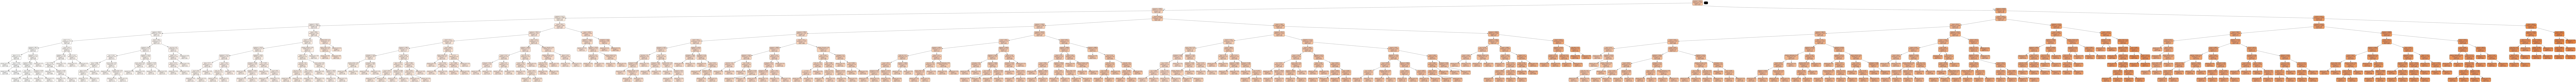

In [47]:
graph = get_dt_graph(model, feature_names=x.columns)
Image(graph.create_png())


In [48]:
evaluate_model(model)

Train R2 Score        : 0.9998863413437701
Train MAE             : 0.0010236630947760162
Train MSE             : 5.641765951799775e-06
Train RMSE            : 0.0023752401882335553
--------------------------------------------------
Test R2 Score         : 0.9860748770853126
Test MAE              : 0.018042625440193034
Test MSE              : 0.0006839102586905952
Test RMSE             : 0.02615167793260301


In [35]:
model=DecisionTreeRegressor(min_samples_split=20)
model.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_split=20)

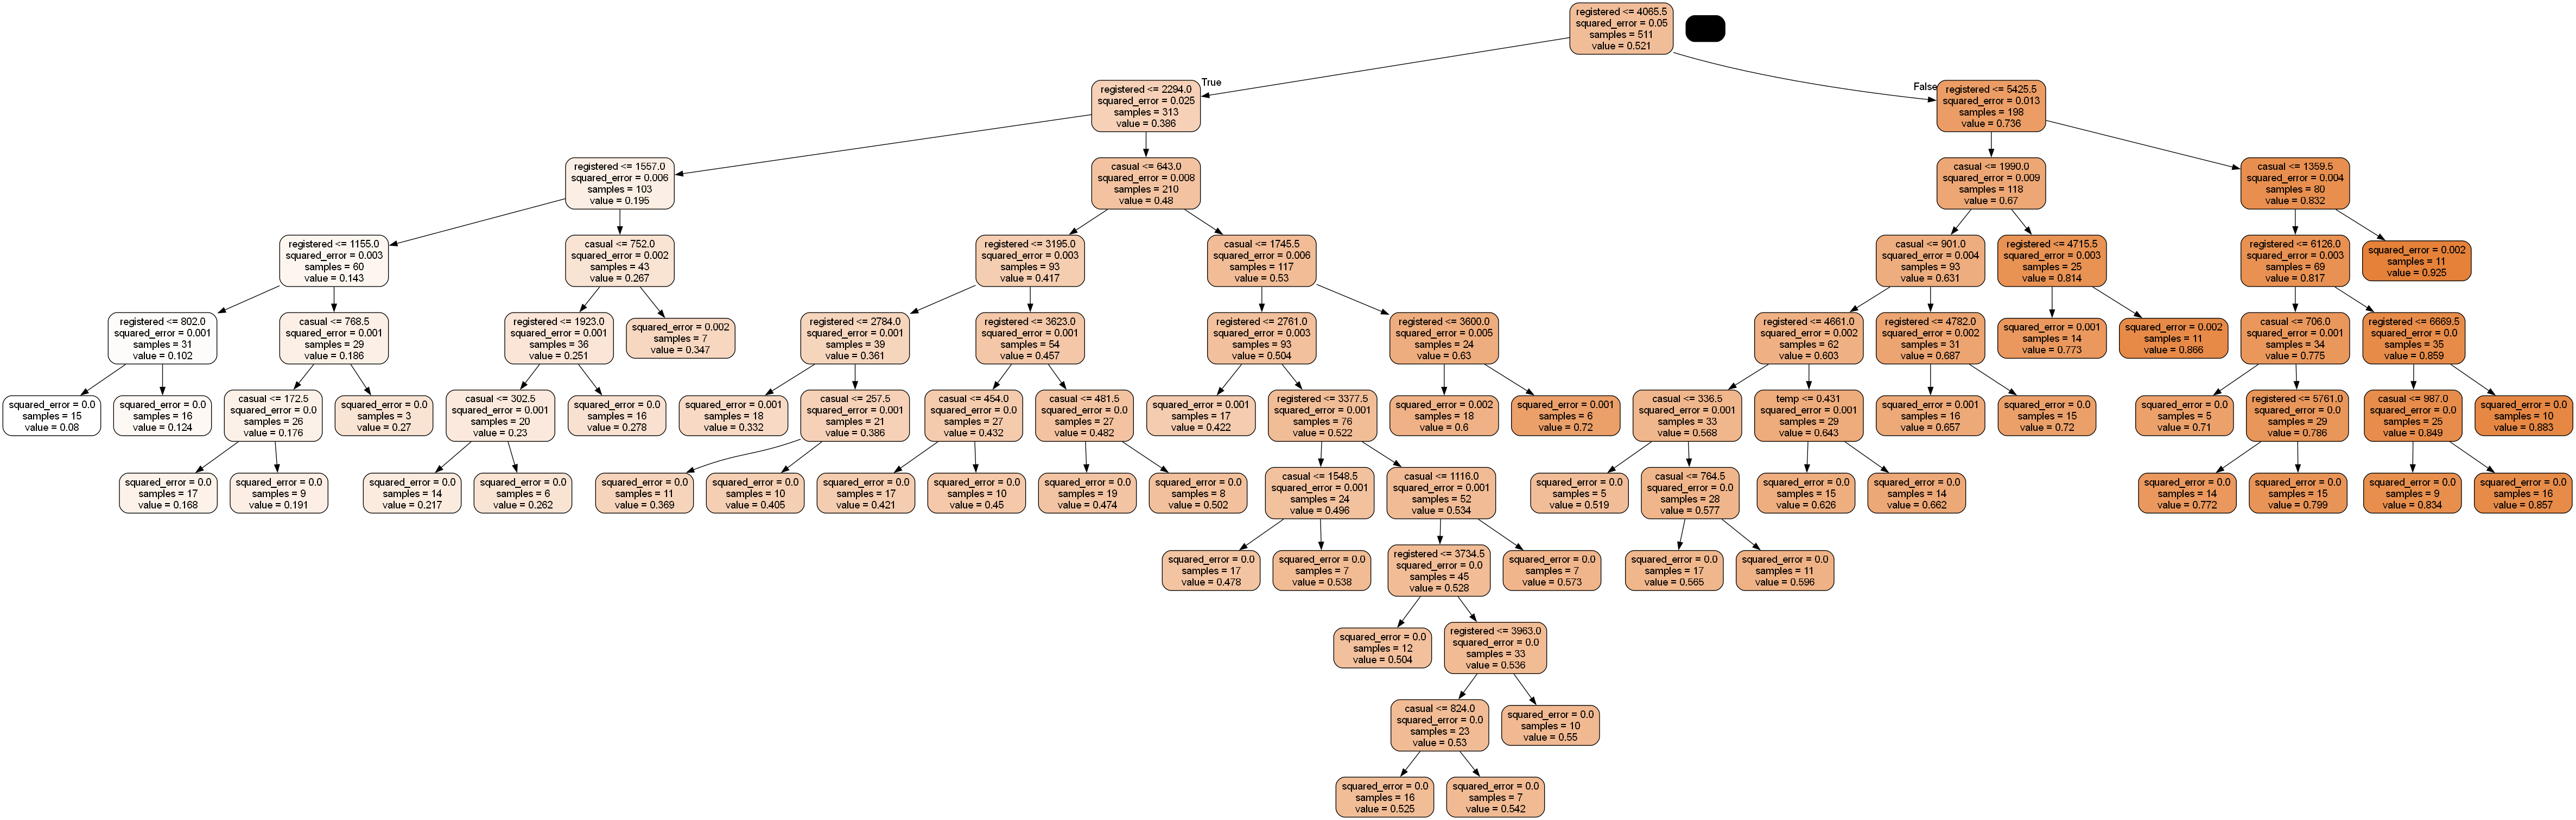

In [36]:
graph = get_dt_graph(model, feature_names=x.columns)
Image(graph.create_png())


In [37]:
evaluate_model(model)

Train R2 Score        : 0.9901983352793629
Train MAE             : 0.015753371779432916
Train MSE             : 0.0004865330994233697
Train RMSE            : 0.022057495311647912
--------------------------------------------------
Test R2 Score         : 0.9763906570612777
Test MAE              : 0.02490017957983862
Test MSE              : 0.0011595353186940995
Test RMSE             : 0.03405195029207724


In [38]:
dt=DecisionTreeRegressor(random_state=42)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param = {
    'max_depth': [3, 5, 10, 15, 20],            # Limits tree depth (controls overfitting)
    'min_samples_split': [2, 5, 10, 20],              # Minimum samples to split a node
   'min_samples_leaf': [1, 2, 5, 10],                # Minimum samples in a leaf node
   # 'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider for split
   'criterion': ['squared_error', 'friedman_mse'],   # For regressor; use 'gini' or 'entropy' for classifier
   # 'splitter': ['best', 'best']                    # Best split or randomly chosen split
}


In [41]:
grid_search=GridSearchCV(estimator=dt,
                         param_grid=param,
                        cv=4,n_jobs=-1,verbose=1,scoring="r2")

In [42]:
%%time
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 160 candidates, totalling 640 fits
CPU times: total: 953 ms
Wall time: 10.2 s


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [3, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2', verbose=1)

In [43]:
score_df=pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.032368      0.006684         0.012634        0.005118   
1       0.021931      0.002002         0.010919        0.002889   
2       0.012996      0.002619         0.005721        0.000802   
3       0.011834      0.001396         0.006683        0.002981   
4       0.013703      0.003932         0.007412        0.000245   

  param_criterion  param_max_depth  param_min_samples_leaf  \
0   squared_error                3                       1   
1   squared_error                3                       1   
2   squared_error                3                       1   
3   squared_error                3                       1   
4   squared_error                3                       2   

   param_min_samples_split                                             params  \
0                        2  {'criterion': 'squared_error', 'max_depth': 3,...   
1                        5  {'criterion': 'squared_error', 'max_depth': 3,...   
2                       10  {'criterion': 'squared_error', 'max_depth': 3,...   
3                       20  {'criterion': 'squared_error', 'max_depth': 3,...   
4                        2  {'criterion': 'squared_error', 'max_depth': 3,...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.911674           0.905601           0.884654            0.89614   
1           0.911674           0.905601           0.884654            0.89614   
2           0.911674           0.905601           0.884654            0.89614   
3           0.911674           0.905601           0.884654            0.89614   
4           0.911674           0.905601           0.884654            0.89614   

   mean_test_score  std_test_score  rank_test_score  
0         0.899517        0.010212              129  
1         0.899517        0.010212              129  
2         0.899517        0.010212              129  
3         0.899517        0.010212              129  
4         0.899517        0.010212              129

In [44]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
37        0.023038      0.006400         0.009861        0.001684   
117       0.034295      0.007494         0.012880        0.001938   
133       0.022656      0.002075         0.007605        0.001595   
149       0.020610      0.002218         0.007088        0.002283   
132       0.024310      0.001118         0.007994        0.001191   

    param_criterion  param_max_depth  param_min_samples_leaf  \
37    squared_error               10                       2   
117    friedman_mse               10                       2   
133    friedman_mse               15                       2   
149    friedman_mse               20                       2   
132    friedman_mse               15                       2   

     param_min_samples_split  \
37                         5   
117                        5   
133                        5   
149                        5   
132                        2   

                                                params  split0_test_score  \
37   {'criterion': 'squared_error', 'max_depth': 10...           0.981581   
117  {'criterion': 'friedman_mse', 'max_depth': 10,...           0.981223   
133  {'criterion': 'friedman_mse', 'max_depth': 15,...           0.981103   
149  {'criterion': 'friedman_mse', 'max_depth': 20,...           0.981103   
132  {'criterion': 'friedman_mse', 'max_depth': 15,...           0.980881   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
37            0.986243           0.985147           0.984719         0.984423   
117           0.985125           0.985675           0.984747         0.984193   
133           0.986239           0.983491           0.984405         0.983809   
149           0.986239           0.983491           0.984405         0.983809   
132           0.983929           0.983193           0.984997         0.983250   

     std_test_score  rank_test_score  
37         0.001732                1  
117        0.001746                2  
133        0.001849                3  
149        0.001849                3  
132        0.001511                5

In [45]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [49]:
dt_best=grid_search.best_estimator_

In [50]:
evaluate_model(dt_best)

Train R2 Score        : 0.9988406917141156
Train MAE             : 0.005301821350746833
Train MSE             : 5.754551595005382e-05
Train RMSE            : 0.007585876083225577
--------------------------------------------------
Test R2 Score         : 0.9873580111526681
Test MAE              : 0.01713317709876504
Test MSE              : 0.0006208911702907234
Test RMSE             : 0.02491768790017893


In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=10, max_depth=3)

In [53]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=42)

In [55]:
sample_tree = rf.estimators_[4]

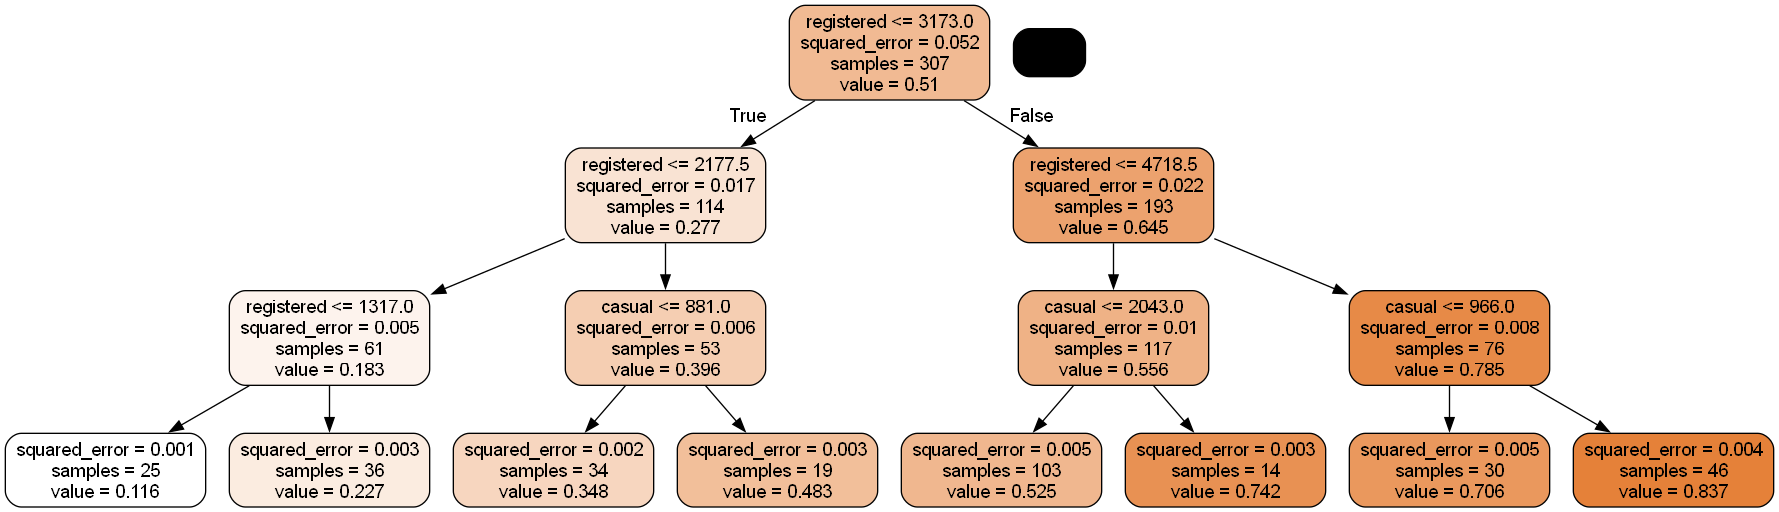

In [58]:
graph = get_dt_graph(sample_tree, feature_names=x.columns)
Image(graph.create_png())


In [59]:
evaluate_model(rf)

Train R2 Score        : 0.9604525291352264
Train MAE             : 0.03439519752717494
Train MSE             : 0.0019630495556210896
Train RMSE            : 0.04430631507608244
--------------------------------------------------
Test R2 Score         : 0.9494205739402202
Test MAE              : 0.03779940810399349
Test MSE              : 0.0024841280448936374
Test RMSE             : 0.04984102772710087


### Grid search for hyper-parameter tuning

In [60]:
regressor_rf=RandomForestRegressor(random_state=42)

In [61]:
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [62]:
grid_search = GridSearchCV(estimator=regressor_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "r2")

In [64]:
%%time
grid_search.fit(x,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: total: 4.69 s
Wall time: 1min 50s


GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [65]:
rf_best = grid_search.best_estimator_

In [66]:
rf_best

RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=5,
                      n_estimators=10, random_state=42)

In [67]:
evaluate_model(rf_best)

Train R2 Score        : 0.9483248124056154
Train MAE             : 0.03856344029532924
Train MSE             : 0.002565042765709459
Train RMSE            : 0.050646251250309325
--------------------------------------------------
Test R2 Score         : 0.9428667471745739
Test MAE              : 0.03880372246812081
Test MSE              : 0.002806008820105966
Test RMSE             : 0.052971773805546345
